In [2]:
include("MDPModelFunctions.jl")
using StatsBase
using PythonPlot

#### Plot Value Function and Reward Function for Equal Cue

In [12]:

function projectSimplex(points)
    
    tripts = zeros(size(points,1),2)

    for idx in 1:size(points,1)

        x = 1.0 / 2
        y = 1.0 / (2 * sqrt(3))
        p1 = points[idx, 1]
        x = x .- (1.0 ./ sqrt(3)) .* p1 .* cos.(pi ./ 6)
        y = y .- (1.0 ./ sqrt(3)) .* p1 .* sin.(pi ./ 6)

        p2 = points[idx, 2]  
        x = x .+ (1.0 ./ sqrt(3)) .* p2 .* cos.(pi ./ 6)
        y = y .- (1.0 ./ sqrt(3)) .* p2 .* sin.(pi ./ 6)
        p3 = points[idx, 3]
        y = y .+ (1.0 ./ sqrt(3) .* p3)

        tripts[idx,:] = [x,y]

    end

    return tripts

end

function plot_simplex(S_tup, Z, ax; title = "")
    
    
    
    S_vec = [collect(s) for s in S_tup]
    S_vec = mapreduce(permutedims, vcat, S_vec)
    N_Quanta = maximum(S_vec)
    points = S_vec/N_Quanta
    tripts = projectSimplex(points);
    
    Z_norm = .1 .+ .8 .* (Z .- minimum(Z))./(maximum(Z) .- minimum(Z));
    
    maxZ = maximum(Z)
    argmaxZs = findall(Z .== maxZ)
    max_tripts = tripts[argmaxZs,:]

    cmap = ColorMap("Greys")


    for idx in 1:size(points,1)

        ax.plot(tripts[idx,1], tripts[idx,2], 'o', color = cmap(Z_norm[idx]))
        ax.text(tripts[idx,1], tripts[idx,2], string(S_tup[idx]), fontsize = 4)

    end
    ax.plot(max_tripts[:,1], max_tripts[:,2], 'o', color = 'r')
    ax.axis("off");
    ax.set_title(title, fontsize = 8)
    
end

function plot_R_and_V(probed_item_prob, axs)
    
    object_probe_probs = zeros(3)
    object_probe_probs[1] = probed_item_prob
    object_probe_probs[2:3] .= (1 - probed_item_prob)/2
    
    N_Objects = 3
    N_Quanta = 7
    S_tup = generate_all_states(N_Quanta,N_Objects)

    R = [get_state_reward(collect(s), object_probe_probs, 1) for s in S_tup];
    V = get_optimal_V(S_tup, object_probe_probs, 1);
    V_enter = R + .99*V;
    
    
    # fig,ax = subplots(1,2, figsize = (6,3), dpi = 200)
    plot_simplex(S_tup, R, axs[1], title = string("Reward; Probe Prob:", probed_item_prob));
    plot_simplex(S_tup, V_enter, axs[2], title = "Value");
    #fig.suptitle(string.(object_probe_probs), fontsize = 10);
    
end

plot_R_and_V (generic function with 1 method)

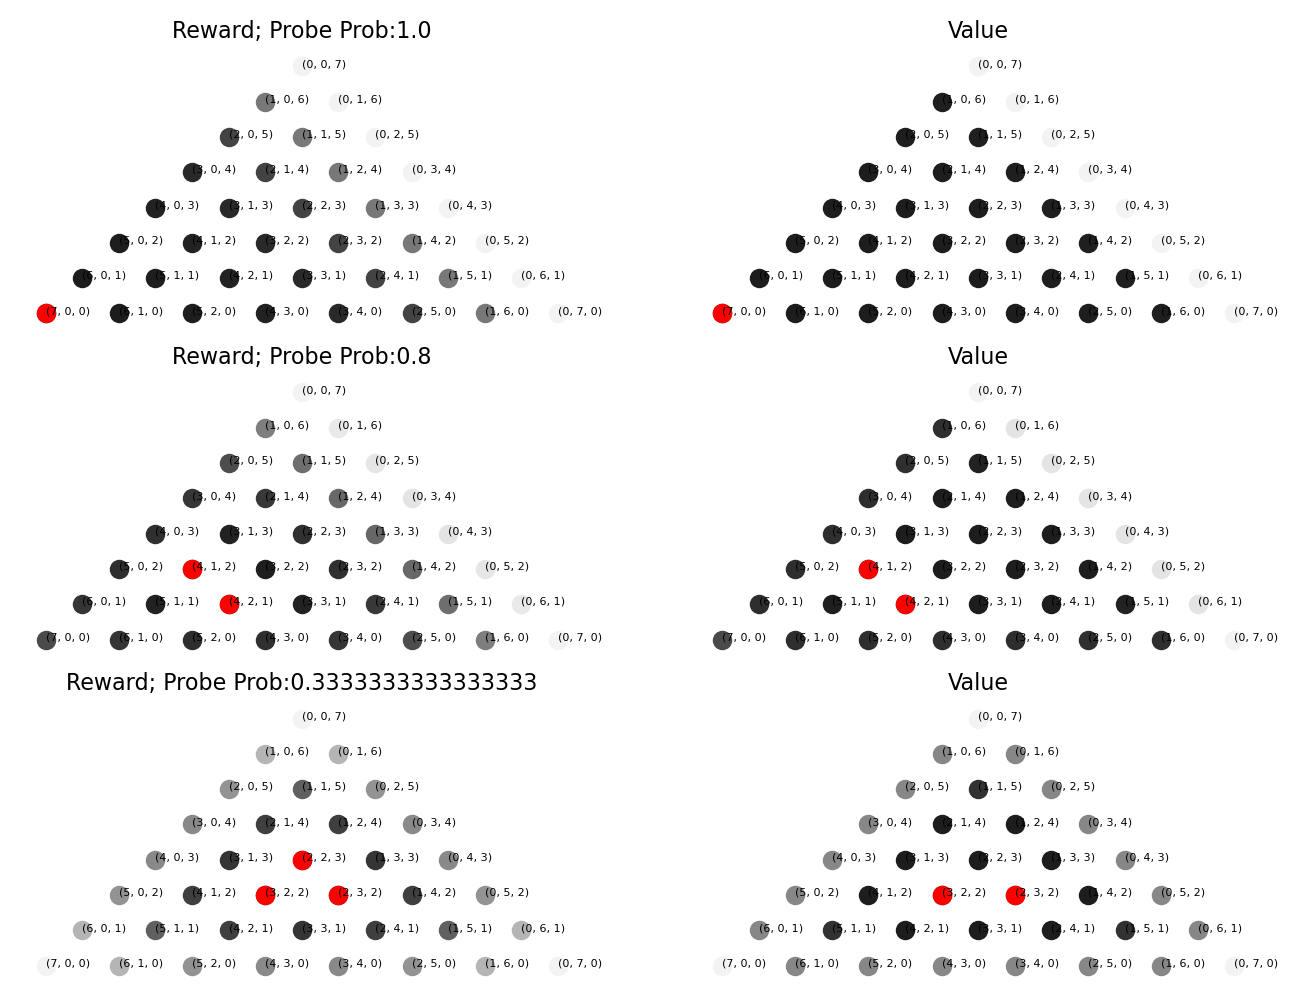

In [15]:
key_item_ps = [1, .8, 1/3]

fig,ax = subplots(3, 2, figsize = (8,6), dpi = 200)

for p_idx in 1:length(key_item_ps)

    plot_R_and_V(key_item_ps[p_idx],[ax[p_idx-1, 0], ax[p_idx-1,1]])
end

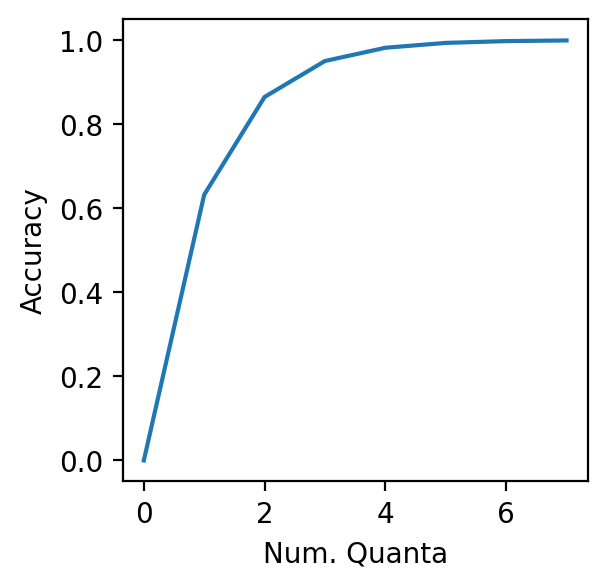

Python: Text(0.5, 47.999999999999986, 'Num. Quanta')

In [10]:
fig,ax = subplots(1, figsize = (3,3), dpi = 200)
ax.plot(0:7, prob_remember(0:7))
ax.set_ylabel("Accuracy")
ax.set_xlabel("Num. Quanta")

In [4]:
p_idx = 1
ax[p_idx-1,0]

Python: <Axes: >

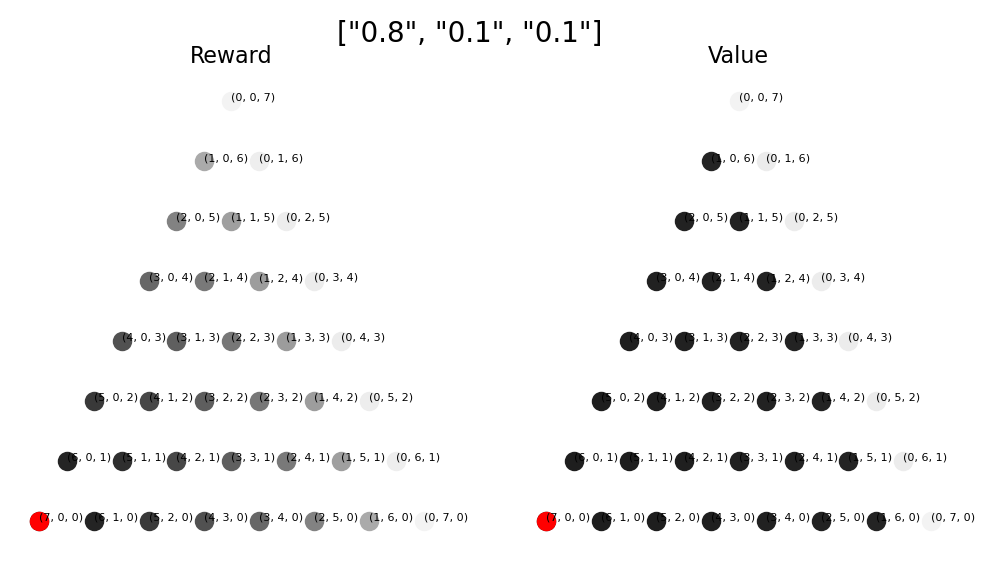

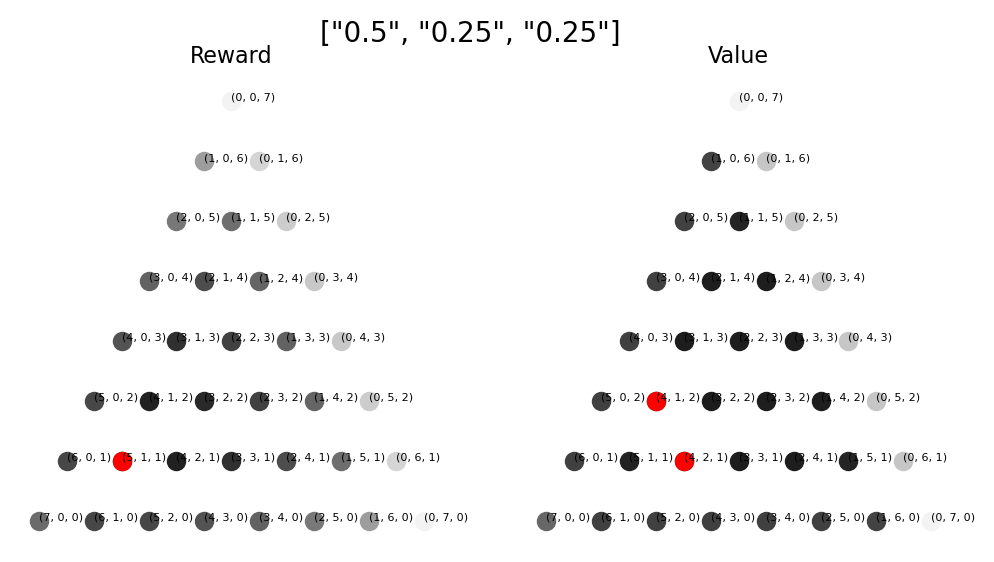

Python: Text(0.5, 0.98, '["0.5", "0.25", "0.25"]')

In [279]:
plot_R_and_V([.8, .1, .1])
plot_R_and_V([.5, .25, .25])

In [268]:
N_Objects = 3
N_Quanta = 7
S_tup = generate_all_states(N_Quanta,N_Objects)

object_probe_probs = 1/N_Objects*ones(N_Objects)
R = [get_state_reward(collect(s), object_probe_probs, 1) for s in S_tup];
V = get_optimal_V(S_tup, object_probe_probs, 1);
V_enter = R + .99*V;

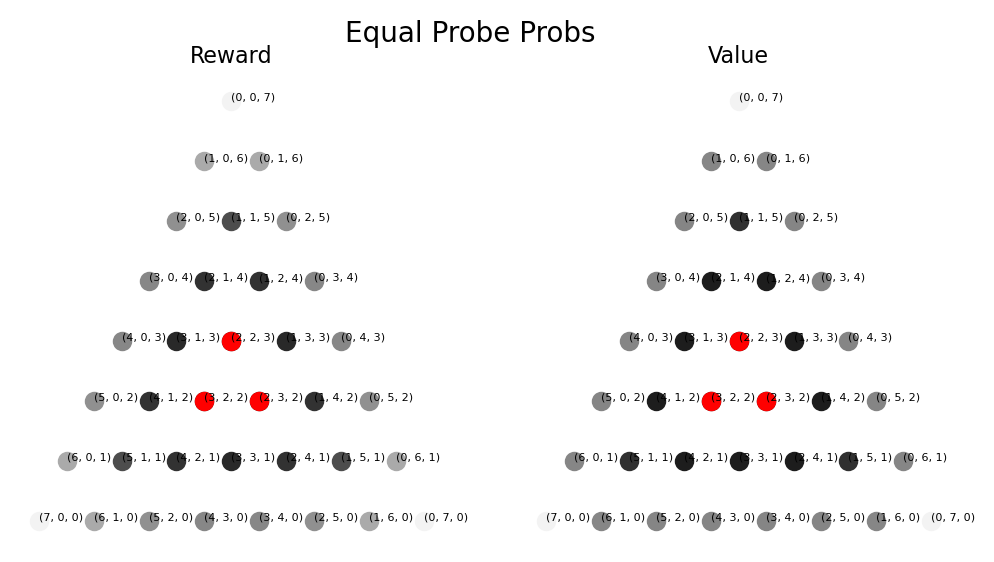

In [269]:
fig,ax = subplots(1,2, figsize = (6,3), dpi = 200)
plot_simplex(S_tup, R, ax[0], title = "Reward");
plot_simplex(S_tup, V_enter, ax[1], title = "Value");
fig.suptitle("Equal Probe Probs", fontsize = 10);